<a href="https://colab.research.google.com/github/yokishin1005/Deepgram_spch_to_text/blob/main/tech0day_vol2_20240405_deepgram%26openai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ①音声ファイルの文字起こし機能の実装
Deepgramという音声認識アプリのAPIを活用して、実現します。
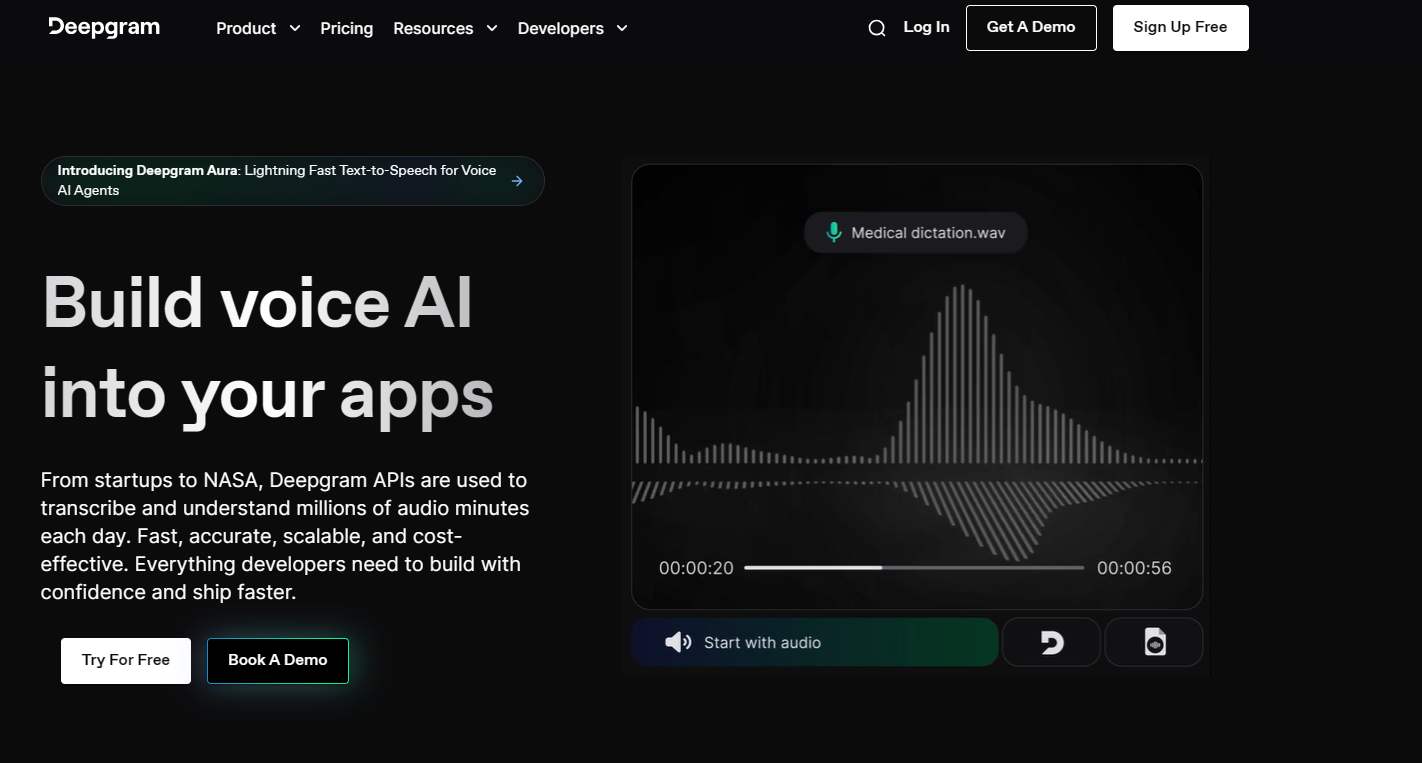
https://playground.deepgram.com/?endpoint=listen&smart_format=true&language=ja&model=nova-2




# ②自動議事録作成
OpenAIのAPIを使い、文字お越しした内容を議事録化します。
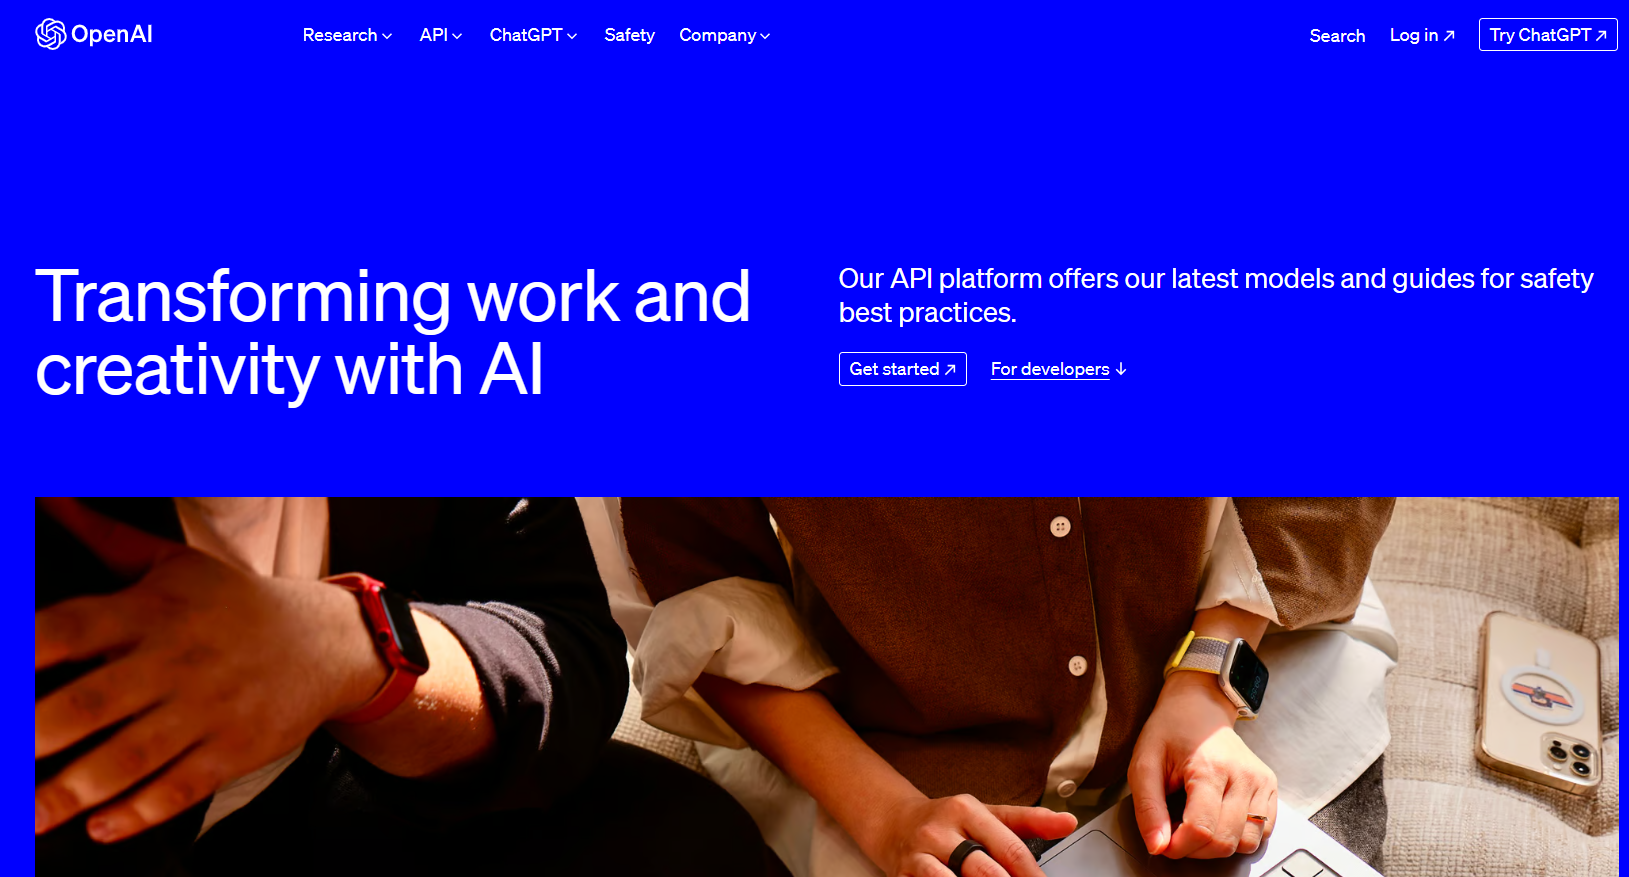

# ①と②を合わせて、音声ファイルの自動議事録化アプリを作成します



In [1]:
pip install deepgram-sdk

Note: you may need to restart the kernel to use updated packages.


In [2]:
#必要なライブラリ（Deepgram）をインポートします。
from deepgram import DeepgramClient, PrerecordedOptions, FileSource

#APIキーを設定します。APIキーは、Deepgramサービスへのアクセスを認証するために使用されます。
#通常はこのように使用すると、悪用されるため、異なる使い方をします
DG_API_KEY = "95051d87e12415baec2a103eb390ce012aa7779a"

In [4]:
#文字起こしを行う音声ファイルを指定します。
AUDIO_FILE = "video.mp4"

#open()関数を使って、音声ファイルをバイナリモードで読み込みます。
deepgram = DeepgramClient(DG_API_KEY)

with open(AUDIO_FILE, "rb") as file:
    buffer_data = file.read()

payload: FileSource = {
    "buffer": buffer_data, }


In [5]:
#音声解析オプションを設定します
#使用するモデル、言語、フォーマットを指定します
options = PrerecordedOptions(
        model="nova-2",
        language="ja",
        smart_format=True,
        diarize=True,#言葉だけでなく、誰が話しているのかも認識させます
)

In [7]:
#文字起こし実行（Deepgramのtranscribe_file()メソッドを実行）
#音声ファイルのバイナリデータと解析オプションを渡します
response = deepgram.listen.prerecorded.v("1").transcribe_file(payload, options, timeout=20)

# 結果の処理と出力
words = response.to_dict()["results"]["channels"][0]["alternatives"][0]["words"]

transcript = ""
current_speaker = None
current_sentence = ""

for word in words:
    speaker = word["speaker"]
    punctuated_word = word["punctuated_word"]

    if current_speaker is None:
        current_speaker = speaker

    if speaker != current_speaker:
        transcript += f"[Speaker {current_speaker}]: {current_sentence.strip()}\n"
        current_speaker = speaker
        current_sentence = ""

    current_sentence += punctuated_word + " "

    if punctuated_word.endswith((".", "!", "?")):
        transcript += f"[Speaker {current_speaker}]: {current_sentence.strip()}\n"
        current_sentence = ""

if current_sentence:
    transcript += f"[Speaker {current_speaker}]: {current_sentence.strip()}\n"

print(transcript.strip())

[Speaker 0]: た は い 押し
[Speaker 1]: ま し た と いう ところ で まあ 五 分 ほど 雑 談 を し た い な と 思 う んですけど スタート 押 す の じゃ と 書い て ある の で 押し て み ま しょう ストップ うどん 派 そば 派
[Speaker 0]: う わ あ これ は そう ね そば 派 そば 派 です ね これ は な ぜ な ら なぜ な ら なんか こう 麺 の 細 さ 的 に なんか こう い っぱい 食 べる の で 。 この 本 通 が 多 い 方 が 腹 い っぱい なり そう な イメージ 。
[Speaker 1]: なるほど っ す ね 。その 感 覚 なかっ
[Speaker 0]: た う ど ん
[Speaker 1]: 派 そば 派 難 し い な 季 節 に も よ る
[Speaker 0]: し それ は めちゃめちゃ ある
[Speaker 1]: やっぱり ざ る そば みたい な の は や っぱ なんか 、 ざ る う ど ん も 好き だ し な
[Speaker 0]: 。そう ね 。やっぱり なんか 水 も 美 味 し い ところ と か ね 、そば や っぱ 食 べ た く なる し
[Speaker 1]: 。確か に チェーン 店 で 気軽 に 入れる 蕎麦屋 さ ん っ て あ ん ま 多 く なく な い
[Speaker 0]: す か 。ああ 、ない っ
[Speaker 1]: す ね なんか 丸 亀 製麺 と か 花 丸 う ど ん っ て 結構 いろんな ところ に ある イメージ で 、しかも 両 方 と も うまい 。 そば っ て そ じ 棒 ぐらい し か で も
[Speaker 0]: 確 か に ね。 立ち 食い そば と か ね 、ああ いう ところ の やっぱり 蕎麦 の イメージ は ある けど 。
[Speaker 1]: 確か に あんまり な い な 、そば の イメージ が
[Speaker 0]: 。 て ぐ い そば だ ね 、ああ いう 文 化 は 面 白 い です けど ね 、なんか ね。 あんまり 行 か な い けど 。
[Speaker 1]: 立っ て 食 う も の っ て 寿司 か そ

In [9]:
with open("transcript.txt", "w") as f:
    f.write(transcript.strip())

In [11]:
!pip install openai==0.27.0

In [12]:
import openai
openai.api_type = "azure"
openai.api_base = "https://tech0-gpt-event-westus.openai.azure.com"
# 実際はこのように書くと、「悪用」されてしまいます。この秘密鍵は今日中に使えなくなります。
openai.api_key = "200e3e4edb1941f9abe0ae005789ad33"
openai.api_version = "2023-05-15"

In [13]:
# chatGPTに質問する
response = openai.ChatCompletion.create(
    engine="gpt-35-turbo",
    messages=[
        {"role": "user", "content": "大谷翔平について50文字以内で教えて"},
    ],
)
# 回答の表示
print(response.choices[0]["message"]["content"].strip())

大谷翔平は日本のプロ野球選手で、ロサンゼルス・エンゼルスに所属する二刀流選手です。投手と打者の両方をこなし、MLBでも注目を集めています。


In [14]:
def summary(transcript):
    # 文字起こしされたテキストを議事録化
    prompt = f"議事録を作成してください。今回の会議の目的とこの会議の次のアクション、会議の発言の要点をそれぞれ箇条書きで要点をまとめてください。：\n{transcript}"

    response = openai.ChatCompletion.create(
        engine="gpt-35-turbo",  # ここで適切なエンジン名を指定
        messages=[
            {"role": "user", "content": prompt},
        ],
    )

    # レスポンスの内容を取得
    summary_result = response.choices[0]["message"]["content"].strip()

    return summary_result

result = summary(transcript)
print(result)


会議の目的:
- 会議の冒頭から雑談を行う
- うどん派とそば派について意見を交換する
- 各自の意見を述べた後、聞き手にどちら派か語ってもらう

会議の次のアクション:
- 会議後、聞き手からどちら派か教えてもらう
- この会議をレコーディングする

会議の発言の要点:
- うどん派かそば派かについて意見を交換
- うどんを選ぶ理由として、麺の太さや、立ち食いうどんの文化が挙げられた
- そばを選ぶ理由として、水が美味しいイメージや、立ち食いそばの文化が挙げられた
- 両方に好きな点はあるが、毎日食べるならうどん、特別な日や美味しいお蕎麦屋さんはそばという意見も述べられた
- どちらかを食べ過ぎると胃にキツくなるという意見もあった


In [15]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [16]:
%%writefile test.py

from deepgram import DeepgramClient, PrerecordedOptions, FileSource
DG_API_KEY = "5a9ae04987be9ed9d53cd724bcd5fa5fb0f95423"

import openai
openai.api_type = "azure"
openai.api_base = "https://tech0-gpt-event-westus.openai.azure.com"
openai.api_key = "7f8e402f4d7a484eb73fa6d6d10ce225"
openai.api_version = "2023-05-15"

import streamlit as st
def transcribe_file(audio_bytes):
    try:
        deepgram = DeepgramClient(DG_API_KEY)
        payload: FileSource = {
            "buffer": audio_bytes,
        }

        options = PrerecordedOptions(
            model="nova-2",
            language="ja",
            smart_format=True,
            diarize=True,
        )

        response = deepgram.listen.prerecorded.v("1").transcribe_file(payload, options)
        return response

    except Exception as e:
        print(f"Exception: {e}")
        return None

def summary(transcript):
    prompt = f"議事録を作成してください。今回の会議の目的と結論、会議の発言の要点をそれぞれ箇条書きでまとめてください。：\n{transcript}"

    response = openai.ChatCompletion.create(
        engine="gpt-35-turbo",  # 適切なエンジン名を指定
        messages=[
            {"role": "user", "content": prompt},
        ],
    )

    summary_result = response.choices[0]["message"]["content"].strip()
    return summary_result

def main():
    st.title('オーディオファイルをアップロードしてください')

    with st.spinner('ファイルを読み込み中...'):
        uploaded_file = st.file_uploader("ファイルを選択してください", type=['mp4', 'wav', 'm4a'])

    if uploaded_file is not None:
        audio_bytes = uploaded_file.read()

        with st.spinner('文字起こし中...'):
            response = transcribe_file(audio_bytes)

        if response is not None:
            transcription = response.to_dict()
            transcript_text = transcription["results"]["channels"][0]["alternatives"][0]["transcript"]
            st.write("文字起こし結果：")
            st.write(transcript_text)

            with st.spinner('議事録作成中...'):
                summarized_text = summary(transcript_text)
                st.write("議事録：")
                st.write(summarized_text)
        else:
            st.error('エラーが発生しました。')

if __name__ == "__main__":
    main()

Writing test.py


In [17]:
from google.colab import files
files.view("/content")
files.view("test.py")

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
#streamlitをlocaltunnelのトンネルで起動
#実行画面に出るyour url is:のurlに接続し、ブラウザの別タブに移動
#Click to Continueでstreamlitの動作を確認
#ExternalURLのXXX.XXXの:よりも前の部分（●●.●●●.●●●.●●●）を入力しcommit
#確認が終わったらこのセルの実行を停止する
!streamlit run test.py & sleep 3 && npx localtunnel --port 8501